# Monographic Lecture in Mathematics
## Time Series
### Lab 1

#### 1. Load 'co2.csv' using Pandas library and set date as the data frame’s index. File consists of four columns: date, mean global CO2 concentration, mean CO2 concentration in northern hemisphere, and mean CO2 concentration southern hemisphere.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('co2.csv', delimiter=";", index_col=0)
df = df[df.index >= "1950"]
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df.head()

,data_mean_global,data_mean_nh,data_mean_sh
date,,,
1950-01-15,313.597898,314.751334,312.444461
1950-02-15,313.968034,315.402500,312.533568
1950-03-15,314.274349,315.997671,312.551026
1950-04-15,314.468454,316.441488,312.495420
1950-05-15,314.310746,316.134174,312.487318


In [87]:
annual_mean = df.groupby(df.index.year).mean()

Text(0, 0.5, 'concentration')

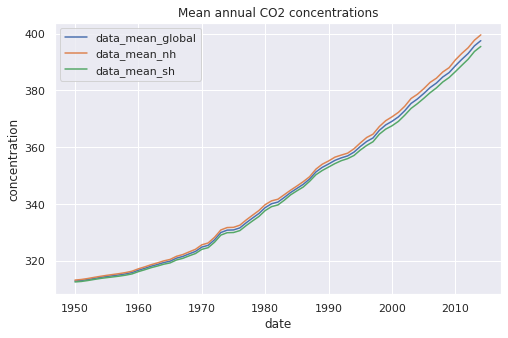

In [88]:
dd = annual_mean.plot(title='Mean annual CO2 concentrations', figsize=(8,5))
dd.set_ylabel("concentration")

In [27]:
fig = dd.get_figure()
fig.savefig("annual_co2_concentrations")

In [89]:
import seaborn as sns

In [90]:
monthly_df = pd.DataFrame(df)
nh_df = pd.DataFrame(df['data_mean_nh'])
nh_df['geo'] = "data_mean_nh"
nh_df.columns = ['value', 'geo']
gl_df = pd.DataFrame(df['data_mean_global'])
gl_df['geo'] = "data_mean_global"
gl_df.columns = ['value', 'geo']
sh_df = pd.DataFrame(df['data_mean_sh'])
sh_df['geo'] = "data_mean_sh"
sh_df.columns = ['value', 'geo']
monthly_df = pd.concat([nh_df, gl_df, sh_df])
monthly_df['month'] = monthly_df.index.strftime('%b')

Text(0, 0.5, 'concentration')

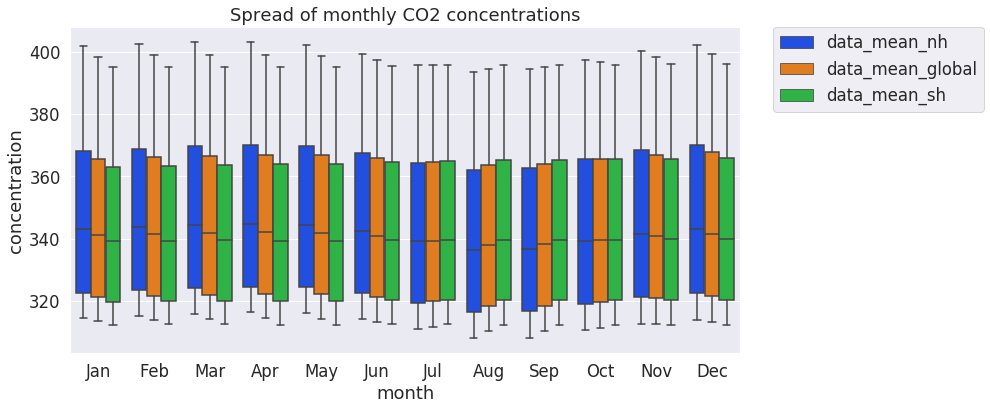

In [91]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.5)
ax = sns.boxplot(
    x='month',y='value',hue='geo', data=monthly_df,
    palette="bright")
handles, labels = ax.get_legend_handles_labels()
ax.set_title("Spread of monthly CO2 concentrations")
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_ylabel('concentration')
# ax.set

In [38]:
dd = ax.get_figure()
dd.savefig('monthly_spread_co2')

Text(0, 0.5, 'concentration')

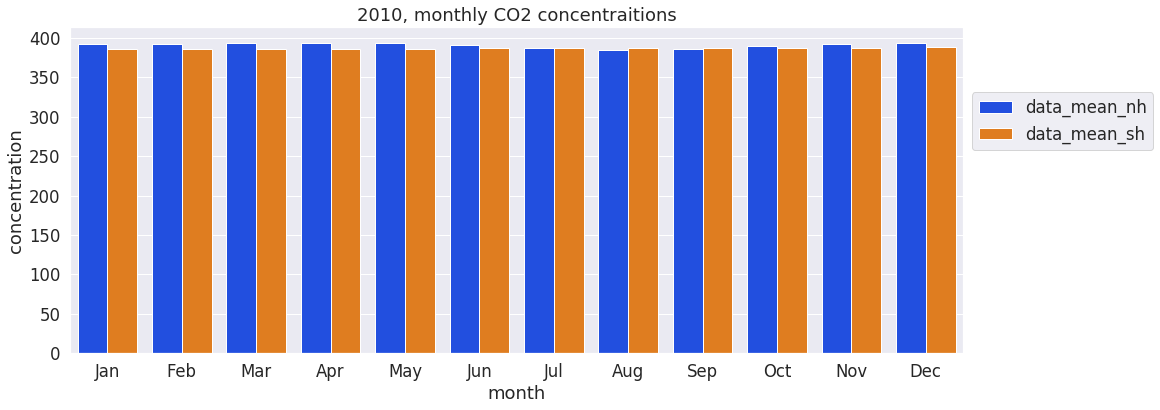

In [92]:
new_monthly = monthly_df.loc[(monthly_df.index.year == 2010) & (monthly_df['geo'] != 'data_mean_global')]
plt.figure(figsize=(16, 6))
ax = sns.barplot(
    x='month', y='value', hue='geo', data=new_monthly,
    palette="bright")
handles, labels = ax.get_legend_handles_labels()
ax.set_title("2010, monthly CO2 concentraitions")
ax.legend(handles, labels, bbox_to_anchor=(1.01, 0.8), loc='upper left', borderaxespad=0.)
ax.set_ylabel('concentration')

In [93]:
from statsmodels.graphics.tsaplots import plot_acf
sns.set(font_scale=1)


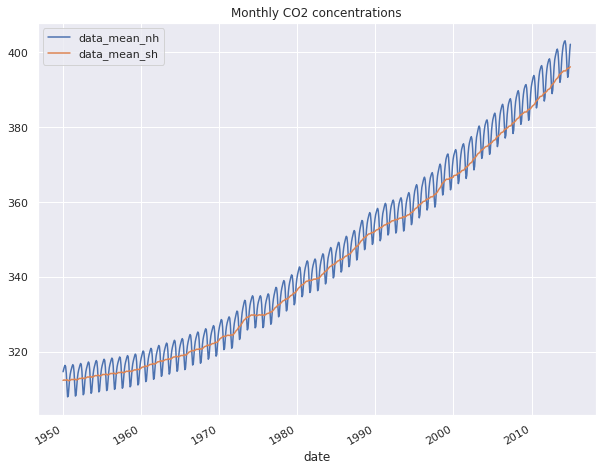

In [94]:
df_nh_sh = df.loc[:, ["data_mean_nh", "data_mean_sh"]]
df_nh_sh.plot(title = "Monthly CO2 concentrations", figsize=(10,8))

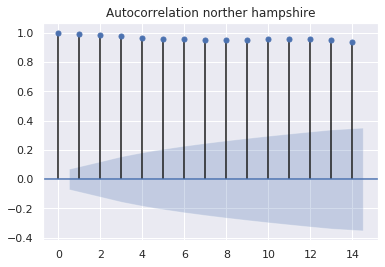

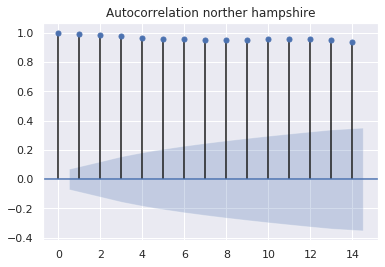

In [95]:
# for i in range(1,16):
plot_acf(df_nh_sh['data_mean_nh'], lags=14, title="Autocorrelation norther hampshire")

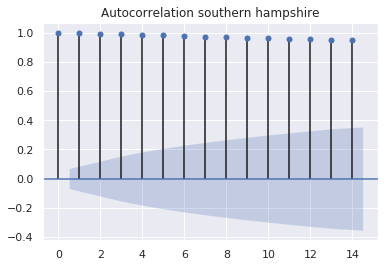

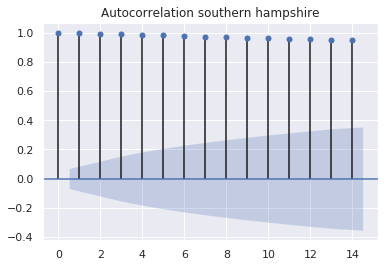

In [96]:
plot_acf(df_nh_sh['data_mean_sh'], lags=14, title="Autocorrelation southern hampshire")

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
nh_df = pd.Series(df["data_mean_nh"].values, index=pd.date_range('1950-01', periods=780, freq='M'))
sh_df = pd.Series(df["data_mean_sh"].values, index=pd.date_range('1950-01', periods=780, freq='M'))

In [98]:
result = seasonal_decompose(nh_df, model='additive')
result2 = seasonal_decompose(nh_df, model='multiplicative')

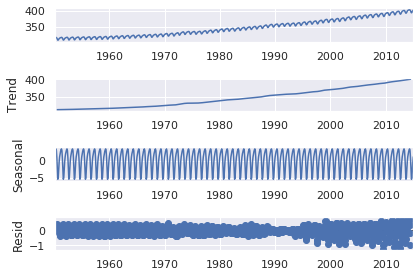

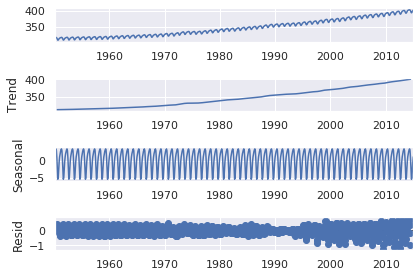

In [99]:
result.plot()

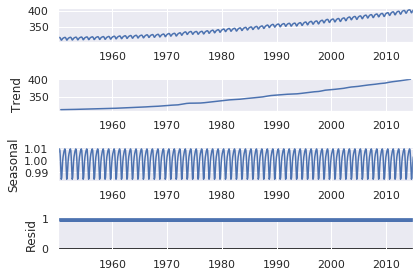

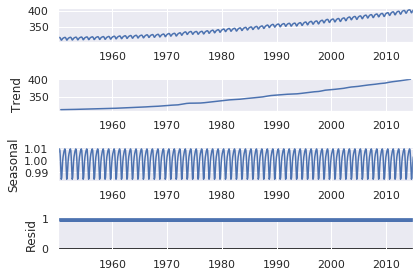

In [100]:
result2.plot()

In [101]:
result = seasonal_decompose(sh_df, model='additive')
result2 = seasonal_decompose(sh_df, model='multiplicative')

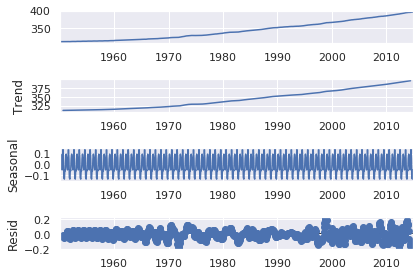

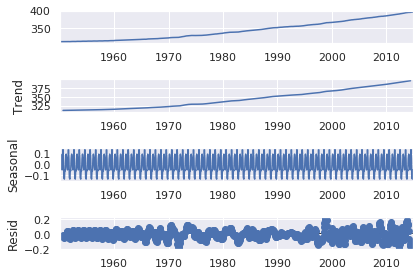

In [102]:
result.plot()

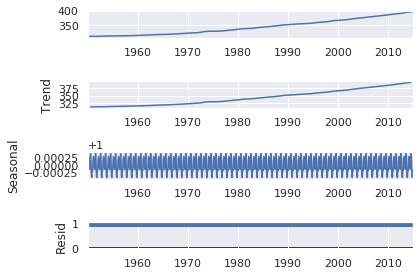

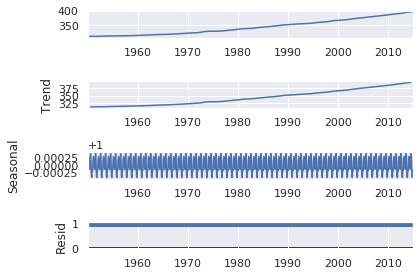

In [103]:
result2.plot()